In [9]:
from konlpy.tag import Okt
from collections import Counter
import feedparser
import newspaper

import matplotlib.pyplot as plt     
import matplotlib
from wordcloud import WordCloud 

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [10]:
t =Okt()
t.nouns('나는 자랑스러운 태극기 앞에')

['나', '태극기', '앞']

In [11]:
t.pos('나는 자랑스런 태극기 앞에 태극기 입니다')

[('나', 'Noun'),
 ('는', 'Josa'),
 ('자랑스런', 'Adjective'),
 ('태극기', 'Noun'),
 ('앞', 'Noun'),
 ('에', 'Josa'),
 ('태극기', 'Noun'),
 ('입니다', 'Adjective')]

In [12]:
my = [1,1,2,3,3,2]
c = Counter( my )
print(c)
print(c.most_common())


Counter({1: 2, 2: 2, 3: 2})
[(1, 2), (2, 2), (3, 2)]


In [13]:
data = t.nouns('나는 자랑스런 태극기 앞에 태극기')  # 명사 글자의 개수 반환
c = Counter( data )
c.most_common()

[('태극기', 2), ('나', 1), ('앞', 1)]

In [14]:
url ='https://rss.joins.com/joins_money_list.xml'
jfeed = feedparser.parse(url)
links =[entry['link'] for entry in jfeed['entries']]
links

['https://news.joins.com/article/23320102?cloc=rss|news|economy',
 'https://news.joins.com/article/23320105?cloc=rss|news|economy',
 'https://news.joins.com/article/23320087?cloc=rss|news|economy',
 'https://news.joins.com/article/23320083?cloc=rss|news|economy',
 'https://news.joins.com/article/23320084?cloc=rss|news|economy',
 'https://news.joins.com/article/23320078?cloc=rss|news|economy',
 'https://news.joins.com/article/23320033?cloc=rss|news|economy',
 'https://news.joins.com/article/23320017?cloc=rss|news|economy',
 'https://news.joins.com/article/23320015?cloc=rss|news|economy',
 'https://news.joins.com/article/23320014?cloc=rss|news|economy',
 'https://news.joins.com/article/23320005?cloc=rss|news|economy',
 'https://news.joins.com/article/23320006?cloc=rss|news|economy',
 'https://news.joins.com/article/23320007?cloc=rss|news|economy',
 'https://news.joins.com/article/23320003?cloc=rss|news|economy',
 'https://news.joins.com/article/23320002?cloc=rss|news|economy',
 'https://

In [15]:
myTxt=''
for lnk in links:
    article = newspaper.Article(lnk, language='ko')
    article.download()
    article.parse()
    myTxt += article.text
myTxt[:500]

'군사안보연구소는 중앙일보의 군사안보분야 전문 연구기관입니다.군사안보연구소는 2016년 10월 1일 중앙일보 홈페이지 조인스( https://news.joins.com )에 문을 연 ‘김민석의 Mr. 밀리터리’( https://news.joins.com/mm )를 운영하며 디지털 환경에 특화된 군사ㆍ안보ㆍ무기에 관한 콘텐트를 만들고 있습니다.연구소 사람들김민석 소장 : kimseok@joongang.co.kr (02-751-5511)국방연구원 전력발전연구부ㆍ군비통제센터를 거쳐 1994년 중앙일보에 입사한 국내 첫 군사전문기자다. 국방부를 출입한 뒤 최장수 국방부 대변인(2010~2016년)으로 활동했다. 현재는 군사안보전문기자 겸 논설위원으로 한반도 군사와 안보문제를 깊게 파헤치는 글을 쓰고 있다.박용한 연구위원 : park.yonghan@joongang.co.kr (02-751-5516)‘북한의 급변사태와 안정화 전략’을 주제로 북한학 박사를 받았다. 국방연구원 안보전략연구센터ㆍ군사'

In [16]:
len(myTxt)

24997

In [17]:
nData= t.nouns(myTxt)

In [18]:
c = Counter(nData)
nCount = c.most_common()

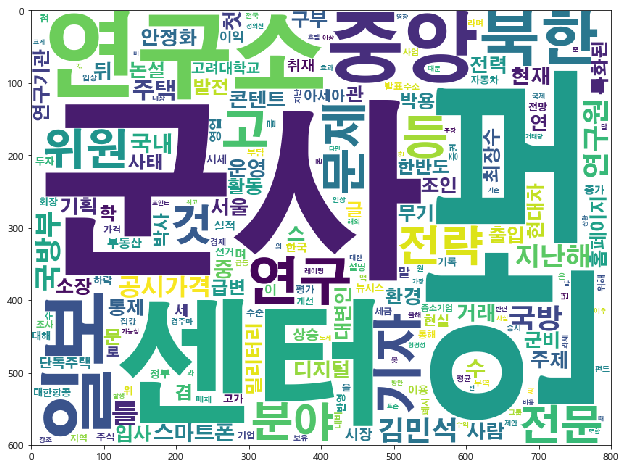

In [24]:
fpath = 'C:\Windows\Fonts\H2GTRE.TTF'
w = WordCloud (font_path = fpath , background_color='white', width=800 , height=600)
cloud = w.generate_from_frequencies(c)
plt.figure( figsize=(12,8) )
plt.imshow( cloud )
plt.show()